In [1]:

import pandas as pd
import numpy as np

# Librairie importer pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_palette("viridis")

# Librairies importer pour la mise en place des modèles (Feature Engineering et transformation des données)
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split # Séparation du jeu de données en un jeu d'entrainenent et de test
from sklearn.preprocessing import OneHotEncoder # Encodage des variables
from sklearn.preprocessing import LabelEncoder # Encodage des variables
from sklearn.preprocessing import StandardScaler # Standardisation des données
from imblearn.under_sampling import RandomUnderSampler # Technique d'échantillonnage undersampling

# Librairies importer pour les modèles 
from sklearn.linear_model import LogisticRegression # Regression logistique
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neighbors import KNeighborsClassifier # KNN
import xgboost as xgb # XGBoost
from xgboost import XGBClassifier # XGBoost

# # Librairies importer pour calculer et améliorer les performances
from sklearn.metrics import recall_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import loguniform

# Analyse exploratoire (données regroupées)

In [ ]:
# Télécharger le fichier accident avec comme index Num ACC (Numéro d'identifiant de l’accident)
accidents=pd.read_csv('accidents.csv', index_col='Num_Acc')

# Première aperçu des données
accidents.info()

C:\Users\hayat\AppData\Local\Temp\ipykernel_16484\2562715691.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents=pd.read_csv('accidents.csv', index_col='Num_Acc')


<class 'pandas.core.frame.DataFrame'>
Index: 764600 entries, 201800000001 to 202200055302
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   an             764600 non-null  int64  
 1   mois           764600 non-null  int64  
 2   lum            764600 non-null  int64  
 3   agg            764600 non-null  int64  
 4   int            764600 non-null  int64  
 5   atm            764600 non-null  float64
 6   col            764600 non-null  float64
 7   dep            764600 non-null  object 
 8   heure          764600 non-null  int64  
 9   jour_semaine   764600 non-null  int64  
 10  catr           764600 non-null  float64
 11  circ           764600 non-null  float64
 12  surf           764600 non-null  float64
 13  infra          764600 non-null  float64
 14  situ           764600 non-null  float64
 15  obs            764600 non-null  float64
 16  obsm           764600 non-null  float64
 17  choc           76

In [3]:
# Afficher la taille de la base
accidents.shape

# On a 764 600 lignes et 27 colonnes

(764600, 27)

In [4]:
# Afficher le nom des colonnes
accidents.columns

Index(['an', 'mois', 'lum', 'agg', 'int', 'atm', 'col', 'dep', 'heure',
       'jour_semaine', 'catr', 'circ', 'surf', 'infra', 'situ', 'obs', 'obsm',
       'choc', 'manv', 'catv_modifié', 'place', 'catu', 'grav', 'sexe',
       'trajet', 'secu_combined', 'age'],
      dtype='object')

In [5]:
# Afficher les 10 premières lignes
accidents.head(10)

,an,mois,lum,agg,int,atm,col,dep,heure,jour_semaine,...,choc,manv,catv_modifié,place,catu,grav,sexe,trajet,secu_combined,age
Num_Acc,,,,,,,,,,,,,,,,,,,,,
201800000001,2018,1,1,1,4,1.0,1.0,590,15,3,...,3.0,1.0,1.0,1.0,1.0,3.0,1.0,0.0,4.0,90.0
201800000001,2018,1,1,1,4,1.0,1.0,590,15,3,...,3.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,4.0,58.0
201800000001,2018,1,1,1,4,1.0,1.0,590,15,3,...,2.0,15.0,1.0,1.0,1.0,3.0,1.0,0.0,4.0,90.0
201800000001,2018,1,1,1,4,1.0,1.0,590,15,3,...,2.0,15.0,1.0,1.0,1.0,1.0,1.0,5.0,4.0,58.0
201800000002,2018,2,1,2,7,7.0,7.0,590,10,1,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0,71.0
201800000003,2018,3,1,2,3,1.0,7.0,590,11,7,...,1.0,1.0,2.0,1.0,1.0,3.0,1.0,5.0,4.0,31.0
201800000003,2018,3,1,2,3,1.0,7.0,590,11,7,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,4.0,41.0
201800000003,2018,3,1,2,3,1.0,7.0,590,11,7,...,8.0,15.0,1.0,1.0,1.0,3.0,1.0,5.0,4.0,31.0
201800000003,2018,3,1,2,3,1.0,7.0,590,11,7,...,8.0,15.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0,41.0


In [6]:
# Calculer les pourcentages de valeurs manquantes pour chaque variable
accidents.isna().sum() / len(accidents) * 100

an               0.0
mois             0.0
lum              0.0
agg              0.0
int              0.0
atm              0.0
col              0.0
dep              0.0
heure            0.0
jour_semaine     0.0
catr             0.0
circ             0.0
surf             0.0
infra            0.0
situ             0.0
obs              0.0
obsm             0.0
choc             0.0
manv             0.0
catv_modifié     0.0
place            0.0
catu             0.0
grav             0.0
sexe             0.0
trajet           0.0
secu_combined    0.0
age              0.0
dtype: float64

In [ ]:
# Calcul du pourcentage des classes de la variable cible gravité
# Objectif : savoir si dans cette variable on a un déséquilibre de classes
# On veut savoir ici si notre jeu de données est déséquilibré ou non.
# si oui alors on devra le rééquilibrer avec la technqiue du Oversampling ou de l'Undersampling

accidents['grav'] = accidents['grav'].replace({
    1.0: 'Indemne',
    2.0: 'Tué',
    3.0: 'Blessé hospitalisé',
    4.0: 'Blessé léger'
})

accidents['grav'].value_counts(normalize=True)*100


# On observe un déséquilibre des classes.

grav
Indemne               45.062647
Blessé léger          37.997253
Blessé hospitalisé    14.541721
Tué                    2.398378
Name: proportion, dtype: float64

# Test du chi-2

In [10]:
# Test statistique (pour vérifier la corrélation de nos variables avec la variable cible)
chi2_results=[]
for col in accidents.columns:
    contingency_table=pd.crosstab(accidents[col], accidents['grav'])
    chi2, p, _, _ =chi2_contingency(contingency_table)
    chi2_results.append((col,round(chi2,2), round(p,5)))

chi2_df=pd.DataFrame(chi2_results, columns=['Variable', 'Chi2', 'p-value'])
chi2_df=chi2_df.sort_values(ascending=False, by="Chi2")
print(chi2_df)

# On observe que toutes les variables explicatives retenues c’est-à-dire nos 27 variables sont corrélées à la variable cible.

         Variable        Chi2  p-value
22           grav  2293800.00      0.0
16           obsm    90138.20      0.0
19   catv_modifié    83666.14      0.0
15            obs    59806.37      0.0
7             dep    57707.87      0.0
6             col    51767.83      0.0
18           manv    49785.41      0.0
10           catr    30655.32      0.0
17           choc    30150.83      0.0
3             agg    25452.75      0.0
26            age    25125.13      0.0
24         trajet    23701.99      0.0
11           circ    19155.04      0.0
2             lum    10286.90      0.0
14           situ     9643.01      0.0
20          place     8479.18      0.0
8           heure     8044.91      0.0
25  secu_combined     6985.24      0.0
23           sexe     6245.77      0.0
21           catu     6041.94      0.0
4             int     5045.27      0.0
9    jour_semaine     2864.21      0.0
13          infra     2612.31      0.0
5             atm     2326.62      0.0
12           surf     156

# Graphiques

c:\Users\hayat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


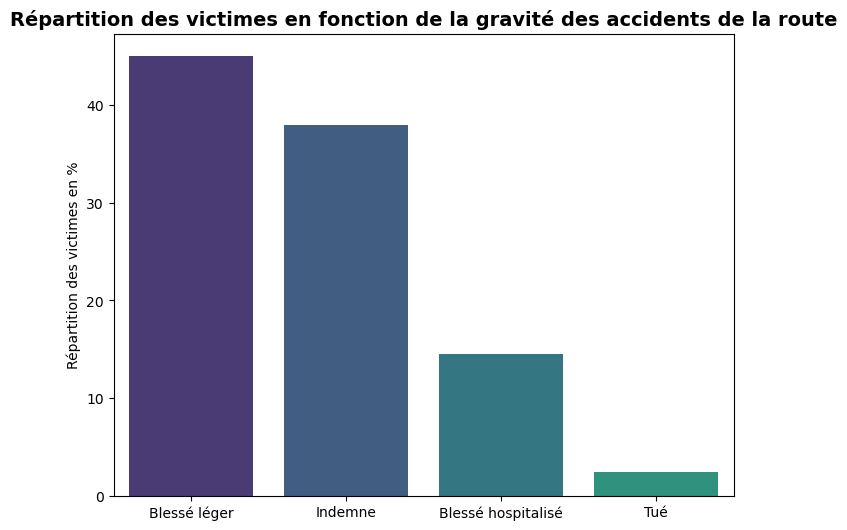

In [11]:
fig=plt.figure(figsize=(8,6))
sns.barplot(
    x=['Blessé léger', 'Indemne', 'Blessé hospitalisé', 'Tué'],
    y=accidents['grav'].value_counts(normalize=True)*100)
plt.title("Répartition des victimes en fonction de la gravité des accidents de la route",fontsize=14, fontweight='bold')
plt.ylabel("Répartition des victimes en %")
plt.show()

c:\Users\hayat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hayat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


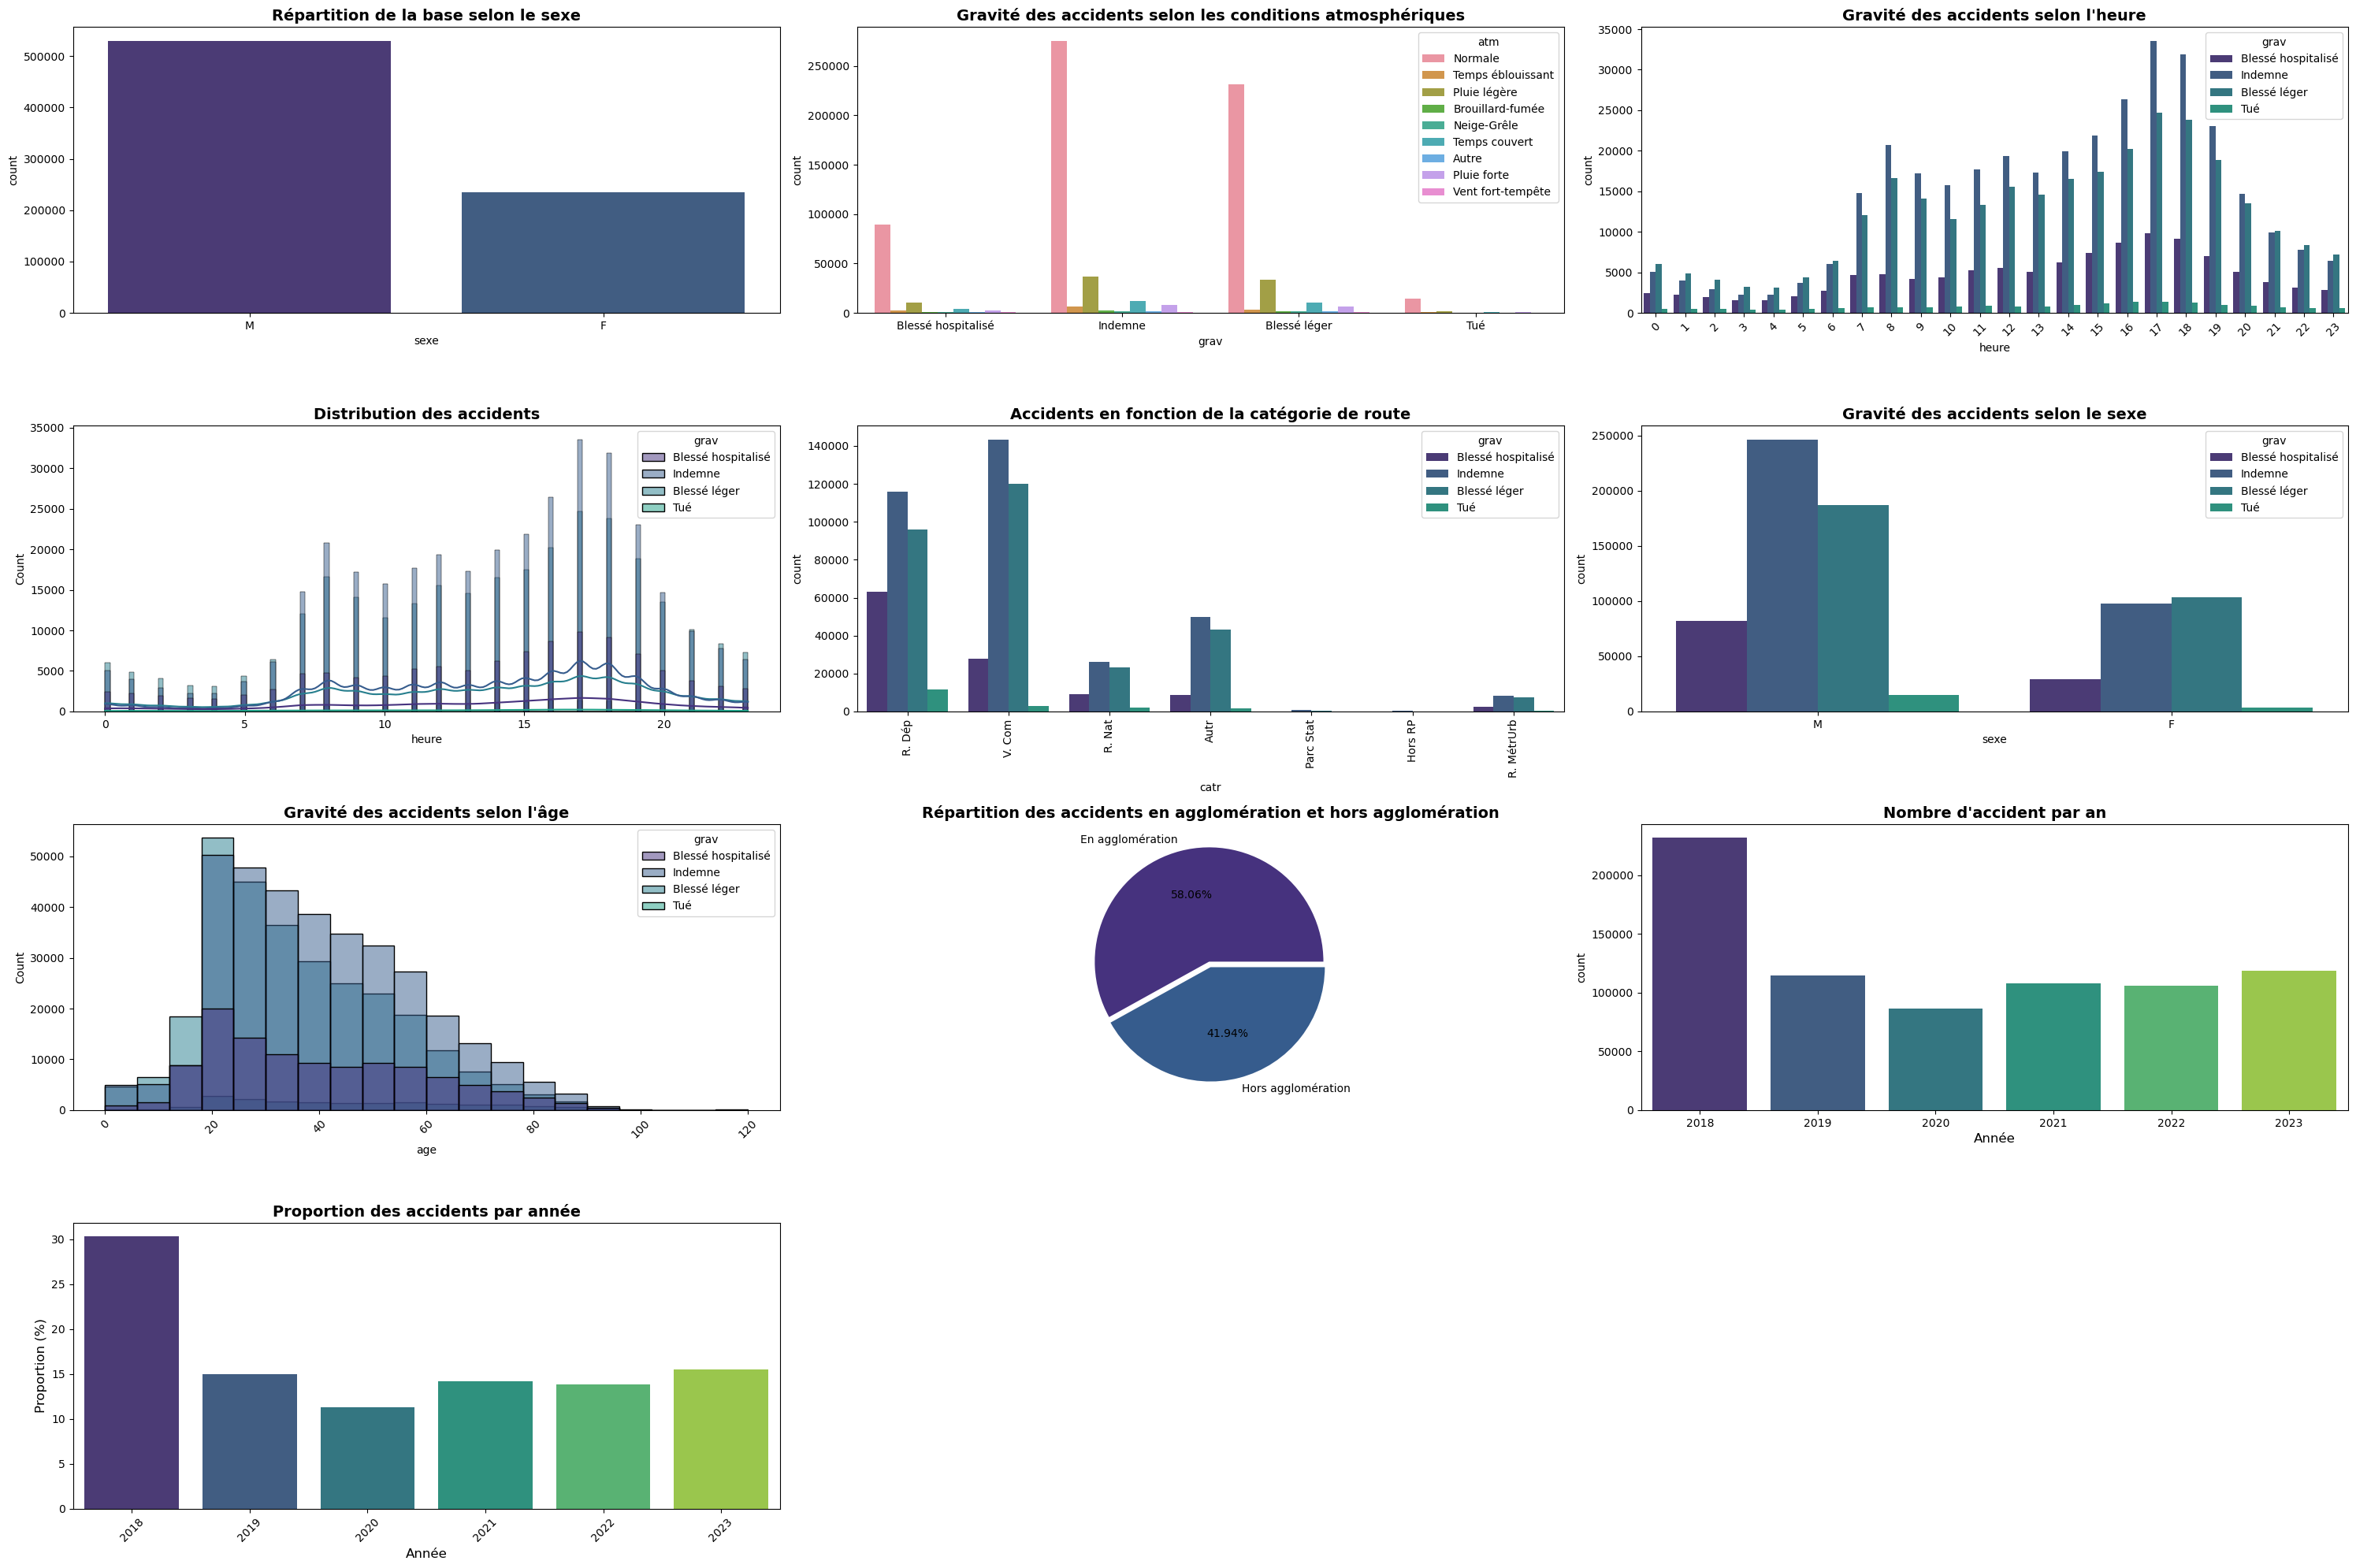

In [12]:
# Graphique
fig = plt.figure(figsize=(30, 20))

# 1er graphique
plt.subplot(4, 3, 1)
sexe_labels = {1: 'M', 2: 'F'}
sns.countplot(x=accidents['sexe'].map(sexe_labels))
plt.title("Répartition de la base selon le sexe", fontsize=14, fontweight='bold')

# 2ème graphique
plt.subplot(4, 3, 2)
atm_labels = {-1: "Non renseigné", 1: 'Normale', 2: 'Pluie légère', 3: 'Pluie forte', 4: 'Neige-Grêle', 
              5: 'Brouillard-fumée', 6: 'Vent fort-tempête', 7: 'Temps éblouissant', 8: 'Temps couvert', 9: 'Autre'}
sns.countplot(x=accidents['grav'], hue=accidents['atm'].map(atm_labels))
plt.title('Gravité des accidents selon les conditions atmosphériques', fontsize=14, fontweight='bold')

# 3ème graphique
plt.subplot(4, 3, 3)
sns.countplot(x=accidents["heure"], hue=accidents['grav'])
plt.xticks(rotation=45)
plt.title("Gravité des accidents selon l'heure", fontsize=14, fontweight='bold')

# 4ème graphique
plt.subplot(4, 3, 4)
sns.histplot(x=accidents['heure'], hue=accidents['grav'], kde=True)
plt.title('Distribution des accidents', fontsize=14, fontweight='bold')

# 5ème graphique
plt.subplot(4, 3, 5)
catr_labels = {1: 'Autr', 2: 'R. Nat', 3: 'R. Dép', 4: 'V. Com', 5: 'Hors RP', 6: 'Parc Stat', 
               7: 'R. MétrUrb', 9: 'Autr'}
sns.countplot(x=accidents['catr'].map(catr_labels), hue=accidents['grav'])
plt.xticks(rotation=90)
plt.title('Accidents en fonction de la catégorie de route', fontsize=14, fontweight='bold')

# 6ème graphique
plt.subplot(4, 3, 6)
sns.countplot(x=accidents['sexe'].map(sexe_labels), hue=accidents['grav'])
plt.title('Gravité des accidents selon le sexe', fontsize=14, fontweight='bold')

# 7ème graphique
plt.subplot(4, 3, 7)
sns.histplot(x=accidents['age'], hue=accidents['grav'], bins=20)
plt.xticks(rotation=45)
plt.title("Gravité des accidents selon l'âge", fontsize=14, fontweight='bold')

# 8ème graphique
plt.subplot(4, 3, 8)
plt.pie(accidents['agg'].value_counts(normalize=True),
        labels=['En agglomération', 'Hors agglomération'], explode=[0.05, 0],
        autopct="%0.2f%%")
plt.title('Répartition des accidents en agglomération et hors agglomération', fontsize=14, fontweight='bold')

# 9ème graphique
plt.subplot(4, 3, 9)
sns.countplot(x=accidents['an'])
plt.xlabel('Année', fontsize=12)
plt.title("Nombre d'accident par an", fontsize=14, fontweight='bold')

# 10ème graphique
plt.subplot(4, 3, 10)
prop_df = accidents['an'].value_counts(normalize=True) * 100
prop_df = prop_df.sort_index()
sns.barplot(x=prop_df.index, y=prop_df.values)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.title("Proportion des accidents par année", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

plt.tight_layout()

# Séparation du jeu de données

In [13]:
# Séparation des variables explicatives (noté X) de la cible (noté y)
X=accidents.drop('grav', axis=1)
y=accidents['grav']

# Diviser le jeu de données en un ensemble d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Encodage des variables

In [14]:
nb_modalite=X.nunique()
print(nb_modalite)

an                 6
mois              12
lum                5
agg                2
int                9
atm                9
col                7
dep              217
heure             24
jour_semaine       7
catr               8
circ               5
surf              10
infra             10
situ               8
obs               18
obsm               7
choc              10
manv              27
catv_modifié      10
place              9
catu               2
sexe               2
trajet             7
secu_combined      5
age              111
dtype: int64


In [15]:
# Variables à encoder avec One-Hot Encoding
var_onehot = ['lum', 'agg', 'col', 'jour_semaine', 'catr', 'circ','situ',
                'obsm', 'catu', 'sexe', 'trajet', 'secu_combined']

# Variables à encoder avec Frequency Encoding
var_freq = ['dep', 'manv', 'obs', 'int', 'atm','surf', 'infra', 'choc', 'catv_modifié', 'place']

enc_onehot = OneHotEncoder(sparse_output=False, drop=None)

# Appliquer l'encodage et convertir en DataFrame
X_train_enc = enc_onehot.fit_transform(X_train[var_onehot])
X_train_enc_df = pd.DataFrame(X_train_enc, columns=enc_onehot.get_feature_names_out(var_onehot), index=X_train.index)

# Concaténer avec le DataFrame original
X_train_enc_df = pd.concat([X_train.drop(columns=var_onehot), X_train_enc_df], axis=1)

In [16]:
print(X_train_enc_df.head())

                an  mois  int  atm dep  heure  surf  infra  obs  choc  ...  \
Num_Acc                                                                ...   
201900029512  2019    12    1  8.0  75     16   2.0    1.0  0.0   4.0  ...   
202200029834  2022    11    1  1.0  93     11   1.0    0.0  0.0   1.0  ...   
201900037702  2019     4    1  1.0  38     17   1.0    9.0  0.0   3.0  ...   
202100036445  2021     6    1  1.0  13     17   1.0    0.0  0.0   3.0  ...   
202200027255  2022     4    1  1.0  26     16   1.0    0.0  1.0   1.0  ...   

              trajet_2.0  trajet_3.0  trajet_4.0  trajet_5.0  trajet_9.0  \
Num_Acc                                                                    
201900029512         0.0         0.0         1.0         0.0         0.0   
202200029834         0.0         0.0         0.0         0.0         0.0   
201900037702         0.0         0.0         0.0         0.0         0.0   
202100036445         0.0         0.0         0.0         0.0         0.0 

In [ ]:
#Frequency encoding pour X Train
for var in var_freq:
    # Calculer la fréquence de chaque catégorie
    freq_encoding = X_train_enc_df[var].value_counts() / len(X_train_enc_df)
    # Remplacer les catégories par leur fréquence
    X_train_enc_df[var] = X_train_enc_df[var].map(freq_encoding)
X_train_enc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 611680 entries, 201900029512 to 201800031078
Data columns (total 79 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   an                 611680 non-null  int64  
 1   mois               611680 non-null  int64  
 2   int                611680 non-null  float64
 3   atm                611680 non-null  float64
 4   dep                611680 non-null  float64
 5   heure              611680 non-null  int64  
 6   surf               611680 non-null  float64
 7   infra              611680 non-null  float64
 8   obs                611680 non-null  float64
 9   choc               611680 non-null  float64
 10  manv               611680 non-null  float64
 11  catv_modifié       611680 non-null  float64
 12  place              611680 non-null  float64
 13  age                611680 non-null  float64
 14  lum_1              611680 non-null  float64
 15  lum_2              611680 non-null  flo

In [18]:
X_test_enc=enc_onehot.transform(X_test[var_onehot])
X_test_enc_df = pd.DataFrame(X_test_enc, columns=enc_onehot.get_feature_names_out(var_onehot), index=X_test.index)

# Concaténer avec le DataFrame original
X_test_enc_df = pd.concat([X_test.drop(columns=var_onehot), X_test_enc_df], axis=1)

In [ ]:
# Frequency encoding pour X Test
for var in var_freq:
    # Calculer la fréquence de chaque catégorie
    freq_encoding = X_test_enc_df[var].value_counts() / len(X_test_enc_df)
    # Remplacer les catégories par leur fréquence
    X_test_enc_df[var] = X_test_enc_df[var].map(freq_encoding)
X_test_enc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152920 entries, 201800028911 to 202000028488
Data columns (total 79 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   an                 152920 non-null  int64  
 1   mois               152920 non-null  int64  
 2   int                152920 non-null  float64
 3   atm                152920 non-null  float64
 4   dep                152920 non-null  float64
 5   heure              152920 non-null  int64  
 6   surf               152920 non-null  float64
 7   infra              152920 non-null  float64
 8   obs                152920 non-null  float64
 9   choc               152920 non-null  float64
 10  manv               152920 non-null  float64
 11  catv_modifié       152920 non-null  float64
 12  place              152920 non-null  float64
 13  age                152920 non-null  float64
 14  lum_1              152920 non-null  float64
 15  lum_2              152920 non-null  flo

In [20]:
# Tout a été encodée. On a que des variables numériques.

In [21]:
# Dimension de mon Dataframe nommé X_enc après encodage
print('train')
n_lignes, n_colonnes = X_train_enc_df.shape
print(n_lignes, n_colonnes)
print()
print('test')
n_lignes1, n_colonnes1 = X_test_enc_df.shape
print(n_lignes1, n_colonnes1)

# On observe que le nombre de colonne a augmenté (79 colonnes) donc l'encodage a bien été réalisé.
# On est passé de 27 variables à 79 variables.

train
611680 79

test
152920 79


# Standardisation ou normalisation des données ?

c:\Users\hayat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hayat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hayat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hayat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

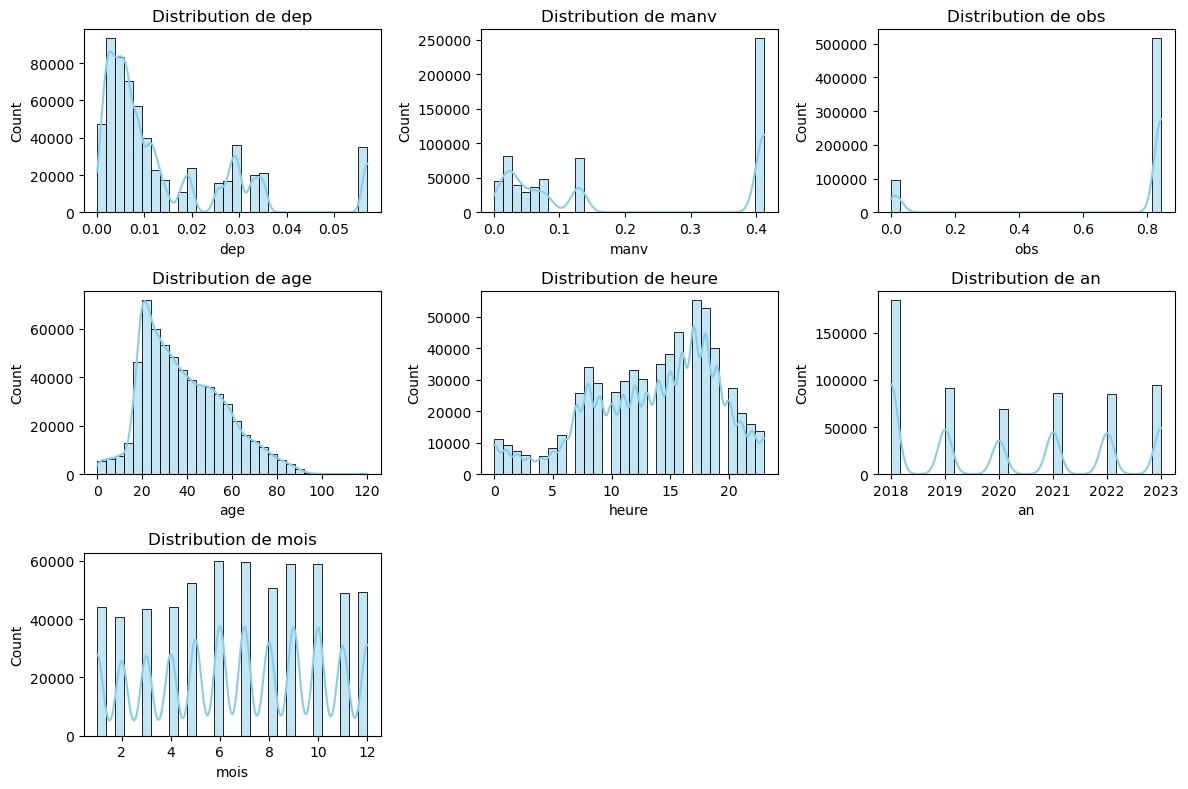

In [22]:
# Normalisation ou standardisation ?
# Il faut vérifier si nos variables numériques suivent une loi normale de ditribution

# Variables numériques à analyser
var_to_check = ['dep','manv','obs','age', 'heure', 'an', 'mois']

# Tracer les histogrammes
plt.figure(figsize=(12, 8))
for i, col in enumerate(var_to_check):
    plt.subplot(3, 3, i+1)
    sns.histplot(X_train_enc_df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution de {col}")

plt.tight_layout()
plt.show()

# Standardisation des données

In [23]:
# Standardiser les données du Dataframe nommé X_enc
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_enc_df)
X_test_scaled=scaler.transform(X_test_enc_df)

# Rééchantillonage des données

In [ ]:
# Rééchantillonnage des données avec la technique d'échantillonnage undersampling
undersamp = RandomUnderSampler()
X_train_undersamp, y_train_undersamp = undersamp.fit_resample(X_train_scaled, y_train)

In [25]:
# On va vérifier que les classes sont rééquilibrées
y_train_undersamp.value_counts(normalize=True)*100

grav
Blessé hospitalisé    25.0
Blessé léger          25.0
Indemne               25.0
Tué                   25.0
Name: proportion, dtype: float64

In [26]:
# On va vérifier que toutes le variables sont toujours au format numériques
y_train_undersamp.info()

<class 'pandas.core.series.Series'>
RangeIndex: 58832 entries, 0 to 58831
Series name: grav
Non-Null Count  Dtype 
--------------  ----- 
58832 non-null  object
dtypes: object(1)
memory usage: 459.8+ KB


# Modèles testés

1 : Regression Logistique 

In [ ]:
# Créer et entraîner le modèle de régression logistique
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_undersamp, y_train_undersamp)

# Prédictions
y_pred = clf.predict(X_test_scaled)

# Calcul du Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}\n")

# Matrice de confusion
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
print("Matrice de confusion :\n")
print(conf_matrix)
print("\n")

# Rapport de classification
report = classification_report(y_test, y_pred)
print("Rapport de classification :\n")
print(report)

Recall: 0.50

Matrice de confusion :

Classe prédite      Blessé hospitalisé  Blessé léger  Indemne   Tué
Classe réelle                                                      
Blessé hospitalisé                7815          3866     2710  7644
Blessé léger                     10291         24862    15502  7635
Indemne                           6393         14378    41957  6237
Tué                                791           307      271  2261


Rapport de classification :

                    precision    recall  f1-score   support

Blessé hospitalisé       0.31      0.35      0.33     22035
      Blessé léger       0.57      0.43      0.49     58290
           Indemne       0.69      0.61      0.65     68965
               Tué       0.10      0.62      0.16      3630

          accuracy                           0.50    152920
         macro avg       0.42      0.50      0.41    152920
      weighted avg       0.58      0.50      0.53    152920



1 bis : Régression logistique avec RandomizedSearchCV et hyperparamètres

In [ ]:
# Définir les hyperparamètres
param_dist = {
    'C': loguniform(0.01, 10),      
    'penalty': ['l2'],                 
    'solver': ['liblinear']            
}

# RandomizedSearchCV 
random_search = RandomizedSearchCV(
    LogisticRegression(max_iter=1000),
    param_distributions=param_dist,
    n_iter=10,                         
    scoring='recall_weighted',
    cv=5,                              
    random_state=42,
    n_jobs=-1                           
)

# Entraîner le modèle avec RandomizedSearchCV
random_search.fit(X_train_undersamp, y_train_undersamp)

# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres :")
print(random_search.best_params_)
print("\n")

# Prédictions
y_pred = clf.predict(X_test_scaled)

# Calcul du Recall 
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}\n")

# Matrice de confusion
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
print("Matrice de confusion :\n")
print(conf_matrix)
print("\n")

# Rapport de classification
report = classification_report(y_test, y_pred)
print("Rapport de classification :\n")
print(report)

Meilleurs hyperparamètres :
{'C': 0.014936568554617643, 'penalty': 'l2', 'solver': 'liblinear'}


Recall: 0.50

Matrice de confusion :

Classe prédite      Blessé hospitalisé  Blessé léger  Indemne   Tué
Classe réelle                                                      
Blessé hospitalisé                7815          3866     2710  7644
Blessé léger                     10291         24862    15502  7635
Indemne                           6393         14378    41957  6237
Tué                                791           307      271  2261


Rapport de classification :

                    precision    recall  f1-score   support

Blessé hospitalisé       0.31      0.35      0.33     22035
      Blessé léger       0.57      0.43      0.49     58290
           Indemne       0.69      0.61      0.65     68965
               Tué       0.10      0.62      0.16      3630

          accuracy                           0.50    152920
         macro avg       0.42      0.50      0.41    152920
   

2 : Random Forest 

In [ ]:
# Initialisation du modèle
rf = RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42)

# Entraînement
rf.fit(X_train_undersamp, y_train_undersamp)

# Prédiction
y_pred = rf.predict(X_test_scaled)

# Calcul du Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}\n")

# Matrice de confusion
print("Matrice de confusion :\n")
print(pd.crosstab(y_test, y_pred, rownames=['classe réelle'], colnames=['classe prédite']))
print("\n")

# Rapport de classification
print("Rapport de classification :\n")
print(classification_report(y_test, y_pred))

Recall: 0.55

Matrice de confusion :

classe prédite      Blessé hospitalisé  Blessé léger  Indemne   Tué
classe réelle                                                      
Blessé hospitalisé                8844          3820     2295  7076
Blessé léger                     10531         27445    14163  6151
Indemne                           5814         13339    45338  4474
Tué                                761           218      203  2448


Rapport de classification :

                    precision    recall  f1-score   support

Blessé hospitalisé       0.34      0.40      0.37     22035
      Blessé léger       0.61      0.47      0.53     58290
           Indemne       0.73      0.66      0.69     68965
               Tué       0.12      0.67      0.21      3630

          accuracy                           0.55    152920
         macro avg       0.45      0.55      0.45    152920
      weighted avg       0.62      0.55      0.57    152920



2 bis : Random forest avec RandomizedSearchCV et hyperparamètres

In [ ]:
# Définir les hyperparamètres
param_dist = {
    'n_estimators': [50, 100],  
    'max_features': ['sqrt', 'log2'],  
    'max_depth': [5, 10],  
    'min_samples_split': [5],  
    'min_samples_leaf': [1, 2]  
}

# Initialisation du modèle 
rf = RandomForestClassifier(class_weight="balanced", random_state=42)

# Randomized Search 
random_search = RandomizedSearchCV(
    rf, 
    param_distributions=param_dist,
    n_iter=5,  
    cv=3, 
    n_jobs=-1, 
    verbose=1,
    random_state=42
)
random_search.fit(X_train_undersamp, y_train_undersamp)

# Meilleurs hyperparamètres 
print("\nMeilleurs hyperparamètres :")
print(random_search.best_params_)
print("\n")

# Entraînement avec les meilleurs hyperparamètres 
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

# Calcul du Recall 
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}\n")

# Matrice de confusion
print("Matrice de confusion :\n")
print(pd.crosstab(y_test, y_pred, rownames=['Réel'], colnames=['Prédit']))
print("\n")

# Rapport de classification
print("Rapport de classification :\n")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 5 candidates, totalling 15 fits

Meilleurs hyperparamètres :
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}


Recall: 0.51

Matrice de confusion :

Prédit              Blessé hospitalisé  Blessé léger  Indemne   Tué
Réel                                                               
Blessé hospitalisé                5642          4369     2448  9576
Blessé léger                      7159         26224    15313  9594
Indemne                           4493         12152    44240  8080
Tué                                473           293      227  2637


Rapport de classification :

                    precision    recall  f1-score   support

Blessé hospitalisé       0.32      0.26      0.28     22035
      Blessé léger       0.61      0.45      0.52     58290
           Indemne       0.71      0.64      0.67     68965
               Tué       0.09      0.73      0.16      3630

          accuracy  

3 : KNN 

In [33]:
# Définition du modèle
knn = KNeighborsClassifier()

# Entraînement du modèle
knn.fit(X_train_undersamp, y_train_undersamp)

# Prédictions
y_pred = knn.predict(X_test_scaled)

# Calcul du recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}\n")

# Matrice de confusion
print("Matrice de confusion :\n")
print(pd.crosstab(y_test, y_pred, rownames=['Réel'], colnames=['Prédit']))
print("\n")

# Rapport de classification
print("Rapport de classification :\n")
print(classification_report(y_test, y_pred))

Recall: 0.44

Matrice de confusion :

Prédit              Blessé hospitalisé  Blessé léger  Indemne   Tué
Réel                                                               
Blessé hospitalisé                9687          4066     2468  5814
Blessé léger                     16716         22342    13112  6120
Indemne                          12585         18442    33045  4893
Tué                               1280           393      247  1710


Rapport de classification :

                    precision    recall  f1-score   support

Blessé hospitalisé       0.24      0.44      0.31     22035
      Blessé léger       0.49      0.38      0.43     58290
           Indemne       0.68      0.48      0.56     68965
               Tué       0.09      0.47      0.15      3630

          accuracy                           0.44    152920
         macro avg       0.38      0.44      0.36    152920
      weighted avg       0.53      0.44      0.47    152920



3 bis : KNN avec RandomizedSearchCV et hyperparamètres 

In [ ]:
# Définition du modèle
knn = KNeighborsClassifier()

# Définition des hyperparamètres à tester
param_dist = {
    'n_neighbors': [3, 5, 7, 9],  
    'metric': ['minkowski','manhattan'],  
    'weights': ['uniform', 'distance']  
}

# RandomizedSearch avec validation croisée
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=5, cv=3, scoring='recall_weighted', n_jobs=-1, random_state=42)
random_search.fit(X_train_undersamp, y_train_undersamp)

# Meilleurs hyperparamètres 
print("\nMeilleurs paramètres :")
print(random_search.best_params_)

# Entraînement avec les meilleurs hyperparamètres
best_knn = random_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)
print("\n")

# Calcul du Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}\n")

# Matrice de confusion
print("Matrice de confusion :\n")
print(pd.crosstab(y_test, y_pred, rownames=['Réel'], colnames=['Prédit']))

# Rapport de classification
print("Rapport de classification :\n")
print(classification_report(y_test, y_pred))


Meilleurs paramètres :
{'weights': 'distance', 'n_neighbors': 7, 'metric': 'manhattan'}


Recall: 0.47

Matrice de confusion :

Prédit              Blessé hospitalisé  Blessé léger  Indemne   Tué
Réel                                                               
Blessé hospitalisé                8235          3855     2679  7266
Blessé léger                     12261         22817    15387  7825
Indemne                           8229         15726    38707  6303
Tué                                957           282      226  2165
Rapport de classification :

                    precision    recall  f1-score   support

Blessé hospitalisé       0.28      0.37      0.32     22035
      Blessé léger       0.53      0.39      0.45     58290
           Indemne       0.68      0.56      0.61     68965
               Tué       0.09      0.60      0.16      3630

          accuracy                           0.47    152920
         macro avg       0.40      0.48      0.39    152920
      weight

4 : XGBOOST

In [ ]:
# Vérifier que les étiquettes sont toutes de même type
y_train_undersamp = y_train_undersamp.astype(str)
y_test = y_test.astype(str)

# Convertir les étiquettes
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train_undersamp)
y_test_enc = label_encoder.transform(y_test)

# Convertir les DataFrames
dtrain = xgb.DMatrix(X_train_undersamp, label=y_train_enc)
dtest = xgb.DMatrix(X_test_scaled, label=y_test_enc)

# Définir les hyperparamètres du modèle
params = {
    'objective': 'multi:softprob',  
    'num_class': len(label_encoder.classes_),  
    'eval_metric': 'mlogloss',
    'learning_rate': 0.1,
    'max_depth': 6,
    'alpha': 10
}

# Entraîner du modèle
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Prédictions
y_pred_proba = bst.predict(dtest)
y_pred_classes = np.argmax(y_pred_proba, axis=1)

# Conversion des indices en étiquettes
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)

# Calcul du Recall
recall = recall_score(y_test, y_pred_labels, average='weighted')
print(f"Recall : {recall:.2f}\n")

# Rapport de classification
print("Rapport de classification :\n")
print(classification_report(y_test, y_pred_labels, zero_division=0))

# Matrice de confusion
print("Matrice de confusion :\n")
print(pd.crosstab(y_test, y_pred_labels, rownames=['Classe réelle'], colnames=['Classe prédite']))
print("\n")

Recall : 0.36

Rapport de classification :

                    precision    recall  f1-score   support

Blessé hospitalisé       0.22      0.44      0.29     22035
      Blessé léger       0.49      0.48      0.48     58290
           Indemne       0.78      0.23      0.35     68965
               Tué       0.08      0.68      0.14      3630

          accuracy                           0.36    152920
         macro avg       0.39      0.46      0.32    152920
      weighted avg       0.57      0.36      0.39    152920

Matrice de confusion :

Classe prédite      Blessé hospitalisé  Blessé léger  Indemne    Tué
Classe réelle                                                       
Blessé hospitalisé                9789          3149      646   8451
Blessé léger                     16394         27745     3681  10470
Indemne                          18278         25240    15612   9835
Tué                                914           187       54   2475




4 bis : XGBOOST avec avec RandomizedSearchCV et hyperparamètres 

In [ ]:
# Vérifier que les étiquettes sont toutes de même type
y_train_undersamp = y_train_undersamp.astype(str)
y_test = y_test.astype(str)

# Encodage des étiquettes
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train_undersamp)
y_test_enc = label_encoder.transform(y_test)

# Définir le modèle 
xgb_clf = XGBClassifier(objective='multi:softprob', num_class=len(label_encoder.classes_), eval_metric='mlogloss')

# Définir la grille de recherche
params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 5, 6],
    'alpha': [0, 1, 5, 10]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_clf, param_distributions=params, n_iter=10, cv=3, scoring='recall_weighted', random_state=42, n_jobs=-1)

# Entraînement du modèle
random_search.fit(X_train_undersamp, y_train_enc)

# Afficher les meilleurs paramètres
print(f"Meilleurs paramètres : {random_search.best_params_}\n")

# Prédiction
y_pred = random_search.predict(X_test_scaled)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Calcul du Recall
recall = recall_score(y_test, y_pred_labels, average='weighted')
print(f"Recall : {recall:.2f}\n")

# Rapport de classification
print("Rapport de classification :\n")
print(classification_report(y_test, y_pred_labels, zero_division=0))

# Matrice de confusion
print("Matrice de confusion :\n")
print(pd.crosstab(y_test, y_pred_labels, rownames=['Classe réelle'], colnames=['Classe prédite']))

Meilleurs paramètres : {'max_depth': 6, 'learning_rate': 0.1, 'alpha': 1}

Recall : 0.36

Rapport de classification :

                    precision    recall  f1-score   support

Blessé hospitalisé       0.22      0.44      0.29     22035
      Blessé léger       0.49      0.46      0.48     58290
           Indemne       0.74      0.24      0.36     68965
               Tué       0.08      0.68      0.14      3630

          accuracy                           0.36    152920
         macro avg       0.38      0.45      0.32    152920
      weighted avg       0.55      0.36      0.39    152920

Matrice de confusion :

Classe prédite      Blessé hospitalisé  Blessé léger  Indemne    Tué
Classe réelle                                                       
Blessé hospitalisé                9649          3043      935   8408
Blessé léger                     15900         26919     4816  10655
Indemne                          18119         24712    16338   9796
Tué                          